## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
d=pd.read_csv('cleaned_data.csv')

## Handle categorical variables with numerically coded values

In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [4]:
d.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## Out of 21 attributes,we don't need to any attribute as categorical variables.As all the attributes are themselves categorical.

In [5]:
d.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Text(0, 0.5, 'BYTES')

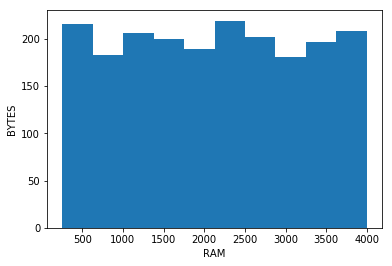

In [6]:
d['ram'].plot.hist()
plt.xlabel('RAM')
plt.ylabel('BYTES')

## Perform univariate and bivariate analysis and derive meaningful insights about the dataset

## Comparing ram column with price_range column

C:\Users\Deepansh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


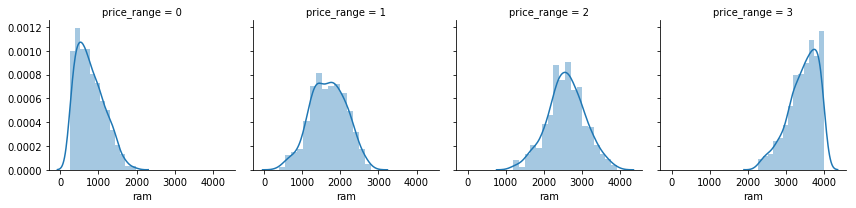

In [7]:
g=sns.FacetGrid(d,col='price_range')
g=g.map(sns.distplot,"ram")
plt.show()

## Taking battery_power attribute

Text(0, 0.5, 'Frequency')

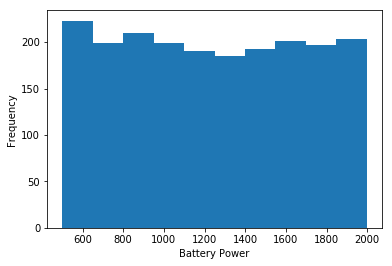

In [8]:
d['battery_power'].plot.hist()
plt.xlabel('Battery Power')
plt.ylabel('Frequency')


## Checking missing values

In [9]:
d.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64


Text(0.5, 1.0, 'Price Range')

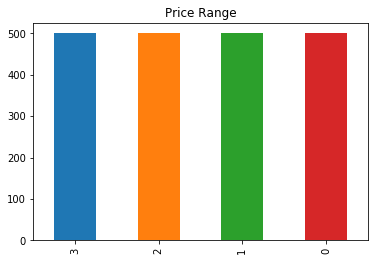

In [10]:
print(d.price_range.value_counts())
d['price_range'].value_counts().plot(kind='bar').set_title('Price Range')

## Removing columns with null values

In [11]:
d.drop('price_range', axis=1,inplace=True)
d.shape

(2000, 20)

## Build a correlation matrix to identify relevant variables ( Graph )

In [15]:
dcolumns = ["wifi", "three_g", "four_g","touch_screen","blue","sc_h","sc_w"]
f=d.drop(dcolumns, axis=1)
f

,battery_power,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time
0,842,2.2,0,1,7,0.6,188,2,2,20,756,2549,19
1,1021,0.5,1,0,53,0.7,136,3,6,905,1988,2631,7
2,563,0.5,1,2,41,0.9,145,5,6,1263,1716,2603,9
3,615,2.5,0,0,10,0.8,131,6,9,1216,1786,2769,11
4,1821,1.2,0,13,44,0.6,141,2,14,1208,1212,1411,15
5,1859,0.5,1,3,22,0.7,164,1,7,1004,1654,1067,10
6,1821,1.7,0,4,10,0.8,139,8,10,381,1018,3220,18
7,1954,0.5,1,0,24,0.8,187,4,0,512,1149,700,5
8,1445,0.5,0,0,53,0.7,174,7,14,386,836,1099,20
9,509,0.6,1,2,9,0.1,93,5,15,1137,1224,513,12


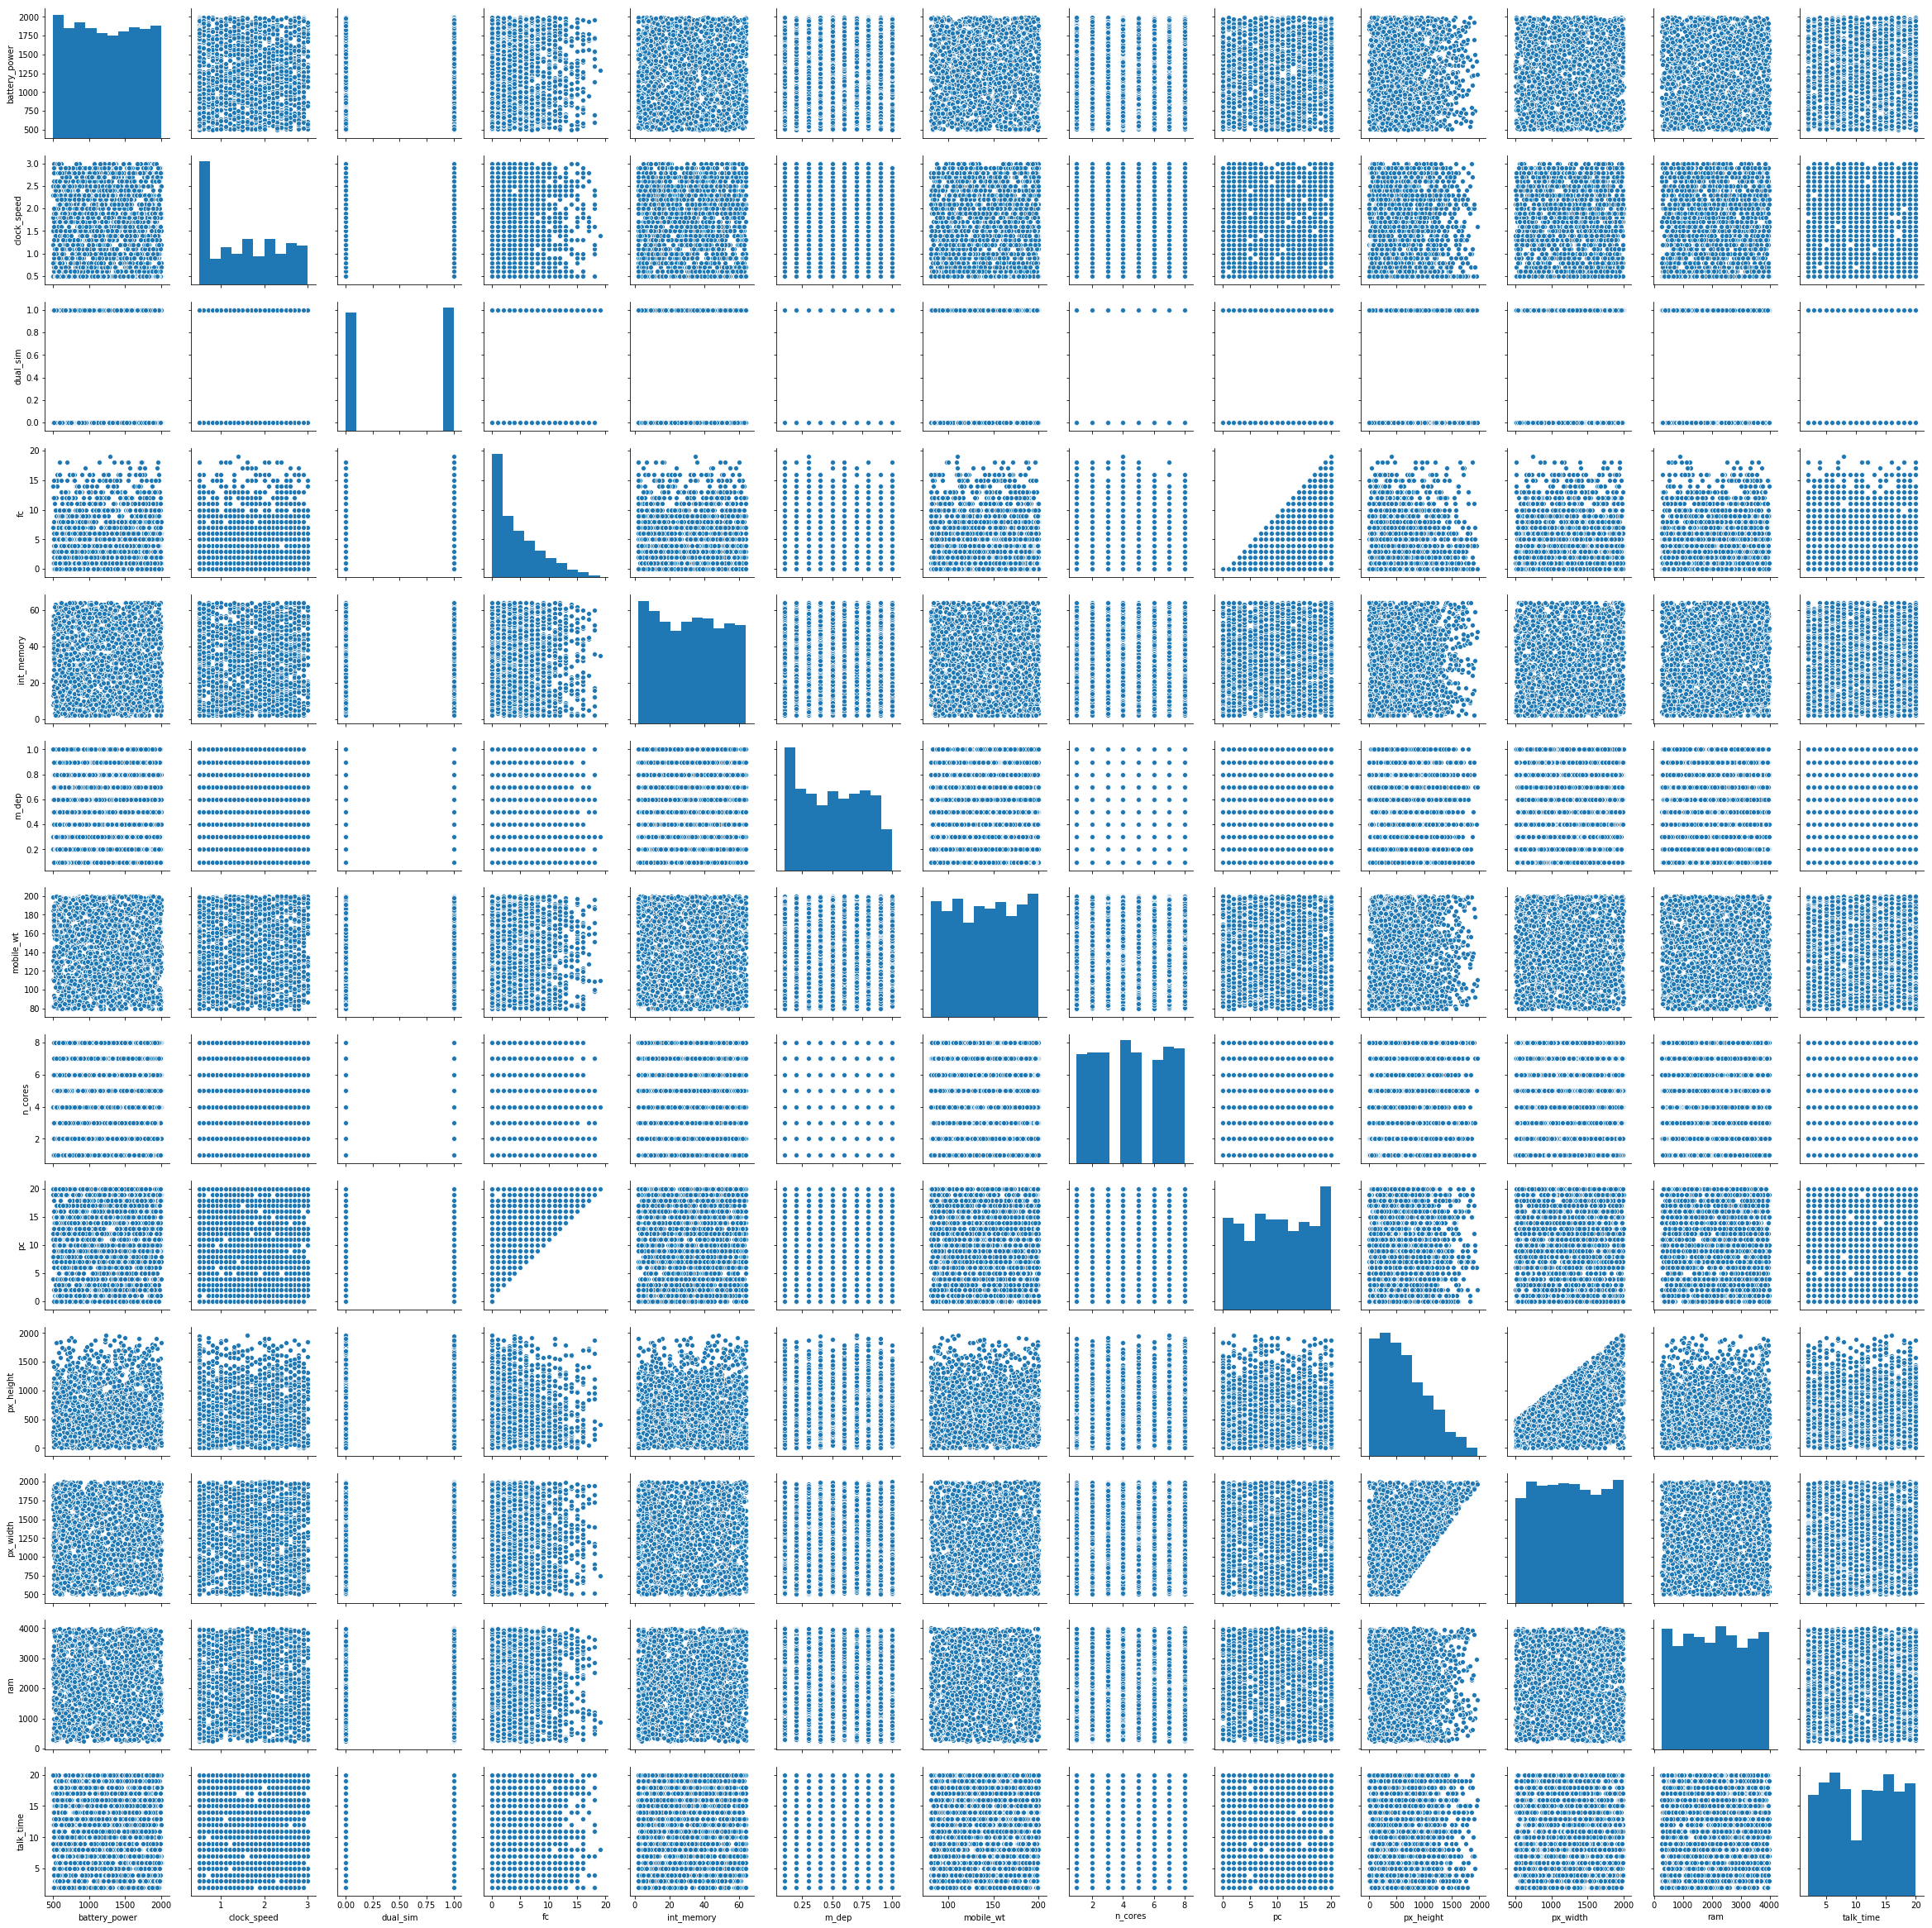

In [16]:
sns.pairplot(f)